### Question 1

#### Create a Binomial distribution graph that includes the following repetitions and values of p **(2.5 points)**  

    Repetitions (events) = 8, 20, 25, 40, 50
    p = 0.15, 0.25, 0.53, 0.74, 0.99

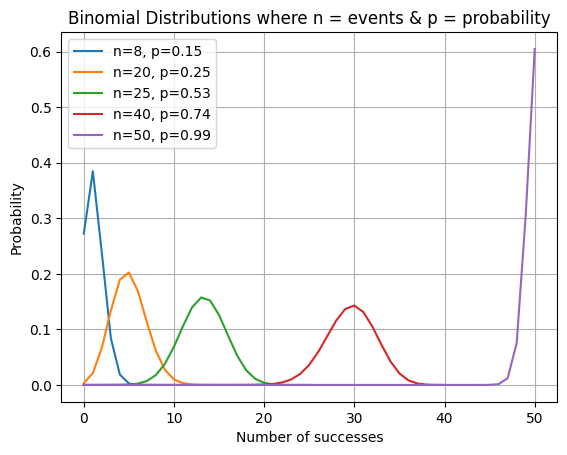

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

repetitions = [8, 20, 25, 40, 50]  # List of different numbers of trials
probabilities = [0.15, 0.25, 0.53, 0.74, 0.99]  # List of different probabilities of success

for n, p in zip(repetitions, probabilities):  # Loop through each pair of trials and probabilities
    x = np.arange(0, n+1)  # Generate an array of possible outcomes (0 to n)
    pmf = stats.binom.pmf(x, n, p)  # Calculate the probability mass function for each outcome
    plt.plot(x, pmf, label=f'n={n}, p={p}')  # Plot the PMF as a line graph with markers

plt.xlabel('Number of successes')  # Label the x-axis
plt.ylabel('Probability')  # Label the y-axis
plt.title('Binomial Distributions where n = events & p = probability')  # Set the title of the graph
plt.legend()  # Add a legend to differentiate the lines
plt.grid(True)  # Add a grid for better readability
plt.show()  # Display the plot


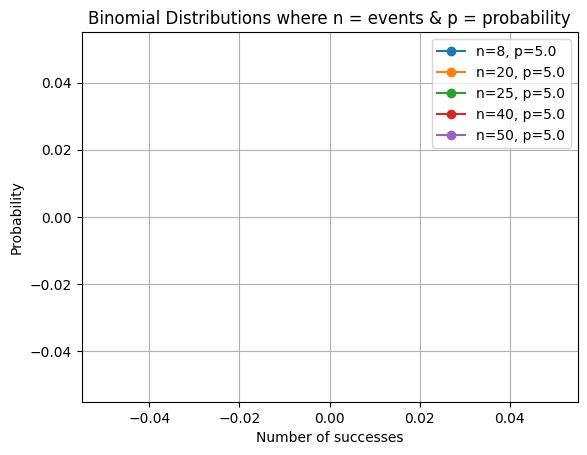

In [15]:
repititions = []
probabilities = []

amount = int(input("Enter the number of times you want to run: "))

for i in range(amount):
    rep = int(input(f"Enter trial number {i + 1}: "))
    prob = float(input(f"Enter probability number {i + 1}: "))
    repititions.append(rep)
    probabilities.append(prob)

for n, p in zip(repetitions, probabilities):  # Loop through each pair of trials and probabilities
    x = np.arange(0, n+1)  # Generate an array of possible outcomes (0 to n)
    pmf = stats.binom.pmf(x, n, p)  # Calculate the probability mass function for each outcome
    plt.plot(x, pmf, marker='o', label=f'n={n}, p={p}')  # Plot the PMF as a line graph with markers

plt.xlabel('Number of successes')  # Label the x-axis
plt.ylabel('Probability')  # Label the y-axis
plt.title('Binomial Distributions where n = events & p = probability')  # Set the title of the graph
plt.legend()  # Add a legend to differentiate the lines
plt.grid(True)  # Add a grid for better readability
plt.show()  # Display the plot

#### Find a pattern and explain your findings.  

As the number of events increases, the probability increases with it.

### Question 2

#### Create a Poison distribution graph that includes the following number of events and values of lambda **(2.5 points)**  

    lambda = 0.5, 1, 1.5, 2, 20
    events = 10, 30, 30, 60, 60

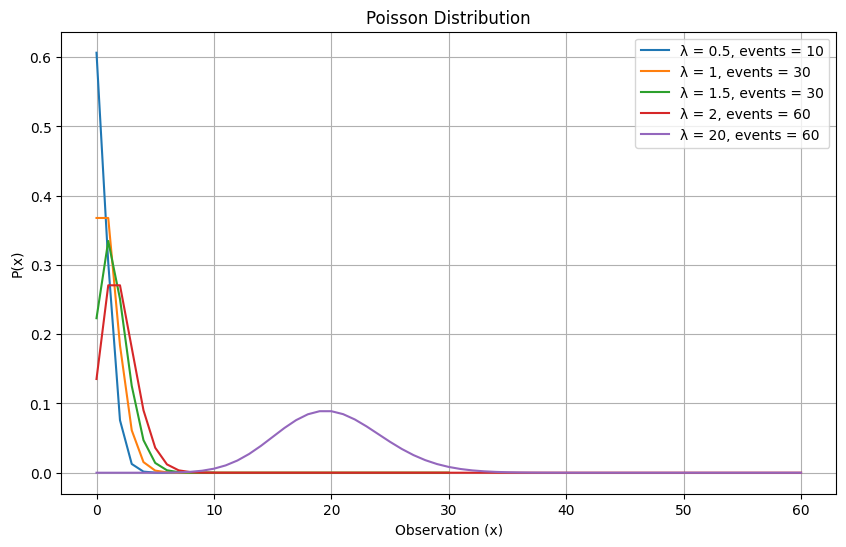

In [4]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def factorial(n):
    fact = 1  # Initializing the factorial result to 1
    for i in range(1, n + 1):
        fact *= i  # Multiplying each number from 1 to n
    return fact  # Returning the factorial of n

def poisson_distribution(lambda_, n_events):
    results = []  # Initializing an empty list to store results
    for x in range(0, n_events + 1):
        num_ = (math.exp(-lambda_)) * (lambda_**x)  # Calculating numerator of Poisson formula
        denominator = factorial(x)  # Calculating denominator (factorial of x)
        P_x = num_/denominator  # Calculating the probability P(x)
        results.append([x, P_x])  # Appending the number of events and the probability
    return pd.DataFrame(results, columns=['x', 'P(x)'])  # Creating a DataFrame from the results

lambdas = [0.5, 1, 1.5, 2, 20]  # List of lambda values
events = [10, 30, 30, 60, 60]  # List of corresponding event counts

plt.figure(figsize=(10, 6))  # Creating a figure with a specific size
for lambda_, event in zip(lambdas, events):
    df = poisson_distribution(lambda_, event)  # Getting Poisson distribution DataFrame
    plt.plot(df['x'], df['P(x)'], label=f'λ = {lambda_}, events = {event}')  # Plotting the distribution

plt.xlabel('Observation (x)')  # Labeling the x-axis
plt.ylabel('P(x)')  # Labeling the y-axis
plt.title('Poisson Distribution')  # Adding a title to the plot
plt.legend()  # Adding a legend to the plot
plt.grid(True)  # Adding a grid to the plot for better readability
plt.show()  # Displaying the plot

#### Obtain the following cumulative probabilities:  
`x <= 8, lambda = 15`  
`x <= 8, lambda = 10`  
`x <= 6, lambda = 5`  

In [7]:
import math

def poisson_cumulative(lambda_, x_max):
    cumulative_prob = 0  # Set cumulative probability to 0
    for x in range(x_max + 1):
        # Calculating the Poisson probability for x
        num_ = (math.exp(-lambda_)) * (lambda_**x)
        denominator = math.factorial(x)
        P_x = num_ / denominator
        cumulative_prob += P_x  # Adding the probability to the cumulative probability
    return cumulative_prob  # Returning the cumulative probability

# A list of tuples with x_max (maximum value for x) and lambda_ (lambda value)
values = [(8, 15), (8, 10), (6, 5)]

# Calculating cumulative probabilities for each pair of x_max and lambda_
results = []
for x_max, lambda_ in values:
    prob = poisson_cumulative(lambda_, x_max)
    results.append((x_max, lambda_, prob))

# Displaying results
for x_max, lambda_, prob in results:
    print(f'P(X <= {x_max}) for lambda = {lambda_} is approximately {prob}')


P(X <= 8) for lambda = 15 is approximately 0.03744649347967288
P(X <= 8) for lambda = 10 is approximately 0.33281967875071894
P(X <= 6) for lambda = 5 is approximately 0.7621834629729387


Find the pattern and add some comments on the results

The first two scenarios with a higher lambda result in a lower probability due to the fact that we are expecting to see a larger number of events than we are testing for. Where as the case with the lower lambda and similar Px, the probability will be higher.  
`λ = 15 means it's less likely to see up to 8 events because you expect a lot more.`  
`λ = 10 means seeing up to 8 events is more probable than when λ is 15.`  
`λ = 5 means seeing up to 6 events is quite likely because the average is low.`

### Question 3

#### From the GDP file, obtain the following values: count, mean, std, min, 25% (Q1), 50% (Q2), 75% (Q3), min and max values of the countries in 2019 and 2020 **(1 point)**

Write some insights on what you saw, any interesting finding or
pattern?

### Question 4

#### From the Bayes' Theorem example, calculate the following cases **(3 points)**:  
An analyst wants to know if the a company stocks are going to go up
depending on their results.

The probability of a good report from S&P and Moody’s is 20% given that the
EBITDA (X) was higher than 10% compared to the previous year.
The probability of a good report from S&P is 90% and 20% from Moody’s
given that the revenues (Y) were higher than 15% compared to the previous
year.  

The probability of a good report from S&P is 20% and 90% from Moody’s
given that the inventory (Z) was higher than 20% compared to the previous
year.

`The probability of X is 0.7, the probability of Y is 0.15 and Z is also 0.15.`

##### Probability of X, Y and Z given a good report from S&P

In [16]:
# Given probabilities
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

# Conditional probabilities
P_A_given_X = 0.2
P_A_given_Y = 0.9
P_A_given_Z = 0.2

# Step 1: Calculate the total probability of a good report from S&P (P(A))
P_A = (P_A_given_X * P_X) + (P_A_given_Y * P_Y) + (P_A_given_Z * P_Z)

# Step 2: Calculate the joint probability of X, Y, and Z
P_X_Y_Z = P_X * P_Y * P_Z

# Placeholder for P(A | X ∩ Y ∩ Z) (Assume conditional independence or get exact value)
# For now, we'll use an estimated placeholder
P_A_given_X_Y_Z = 0.2  # This needs exact value

# Step 3: Apply Bayes' Theorem to find P(X ∩ Y ∩ Z | A)
P_X_Y_Z_given_A = (P_A_given_X_Y_Z * P_X_Y_Z) / P_A

print(f'The probability of X, Y, and Z given a good report from S&P is approximately {P_X_Y_Z_given_A:.4f}')

The probability of X, Y, and Z given a good report from S&P is approximately 0.0103


##### Probability of X, Y and Z given a good report from Moody’s and after a good report from S&P

In [21]:
# Given probabilities
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

# Conditional probabilities for S&P
P_A_given_X = 0.2
P_A_given_Y = 0.9
P_A_given_Z = 0.2

# Conditional probabilities for Moody's
P_B_given_X = 0.2
P_B_given_Y = 0.2
P_B_given_Z = 0.9

# Calculate P(A ∩ B)
P_A_and_B = (P_A_given_X * P_B_given_X * P_X) + (P_A_given_Y * P_B_given_Y * P_Y) + (P_A_given_Z * P_B_given_Z * P_Z)

# Assuming conditional independence for joint probability P(X ∩ Y ∩ Z)
P_X_Y_Z = P_X * P_Y * P_Z

# Apply Bayes' Theorem to find P(X ∩ Y ∩ Z | A ∩ B)
P_X_Y_Z_given_A_B = (P_A_and_B * P_X_Y_Z) / P_A_and_B  # Using joint probability

print(f"The probability of X, Y, and Z given good reports from S&P and Moody's is approximately {P_X_Y_Z_given_A_B:.4f}")

The probability of X, Y, and Z given good reports from S&P and Moody's is approximately 0.0158


In [17]:
# Given probabilities
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

# Conditional probabilities
P_A_given_X = 0.2
P_A_given_Y = 0.9
P_A_given_Z = 0.2

P_B_given_X = 0.2
P_B_given_Y = 0.2
P_B_given_Z = 0.9

# Calculate P(A ∩ B)
P_A_and_B = (P_A_given_X * P_B_given_X * P_X) + (P_A_given_Y * P_B_given_Y * P_Y) + (P_A_given_Z * P_B_given_Z * P_Z)

# Calculate joint probability of X, Y, Z (assuming independence)
P_X_Y_Z = P_X * P_Y * P_Z

# Calculate P(A ∩ B | X ∩ Y ∩ Z)
P_A_and_B_given_X_Y_Z = P_A_given_X * P_B_given_X * P_A_given_Y * P_B_given_Y * P_A_given_Z * P_B_given_Z

# Apply Bayes' Theorem
P_X_Y_Z_given_A_B = (P_A_and_B_given_X_Y_Z * P_X_Y_Z) / P_A_and_B

print(f"The probability of X, Y, and Z given good reports from Moody's and S&P is approximately {P_X_Y_Z_given_A_B:.4f}")

The probability of X, Y, and Z given good reports from Moody's and S&P is approximately 0.0002


##### Probability of X, Y and Z given that Moody’s did not emit a good report and after a good report from S&P

In [5]:
# Given probabilities
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

# Conditional probabilities for S&P
P_A_given_X = 0.2
P_A_given_Y = 0.9
P_A_given_Z = 0.2

# Conditional probabilities for Moody's (not a good report)
P_B_given_X = 0.2
P_B_given_Y = 0.2
P_B_given_Z = 0.9

P_not_B_given_X = 1 - P_B_given_X
P_not_B_given_Y = 1 - P_B_given_Y
P_not_B_given_Z = 1 - P_B_given_Z

# Calculate P(A ∩ ¬B)
P_A_and_not_B = (P_A_given_X * P_not_B_given_X * P_X) + (P_A_given_Y * P_not_B_given_Y * P_Y) + (P_A_given_Z * P_not_B_given_Z * P_Z)

# Assuming conditional independence for joint probability P(X ∩ Y ∩ Z)
P_X_Y_Z = P_X * P_Y * P_Z

# Apply Bayes' Theorem to find P(X ∩ Y ∩ Z | A ∩ ¬B)
P_X_Y_Z_given_A_not_B = (P_A_and_not_B * P_X_Y_Z) / P_A_and_not_B  # Using joint probability

print(f"The probability of X, Y, and Z given a good report from S&P and not a good report from Moody's is approximately {P_X_Y_Z_given_A_not_B:.4f}")

The probability of X, Y, and Z given a good report from S&P and not a good report from Moody's is approximately 0.0158


##### Probability of X, Y and Z given that S&P did not emit a good report

In [16]:
# Given probabilities
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

# Conditional probabilities for S&P (not a good report)
P_A_given_X = 0.2
P_A_given_Y = 0.9
P_A_given_Z = 0.2

P_not_A_given_X = 1 - P_A_given_X
P_not_A_given_Y = 1 - P_A_given_Y
P_not_A_given_Z = 1 - P_A_given_Z

# Calculating P(¬A)
P_not_A = (P_not_A_given_X * P_X) + (P_not_A_given_Y * P_Y) + (P_not_A_given_Z * P_Z)

# Assuming conditional independence for joint probability P(X ∩ Y ∩ Z)
P_X_Y_Z = P_X * P_Y * P_Z

P_X_Y_Z_given_not_A = (P_not_A_given_X * P_not_A_given_Y * P_not_A_given_Z * P_X_Y_Z) / P_not_A  # Using joint probability
print(f"The probability of X, Y, and Z given the S&P did not emit a good report is approximately {P_X_Y_Z_given_not_A:.4f}")

The probability of X, Y, and Z given the S&P did not emit a good report is approximately 0.0015


##### Probability of X, Y and Z given that Moody’s emitted a good report and after confirming that S&P did not

In [12]:
# Given probabilities
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

# Conditional probabilities for Moody's (good report)
P_B_given_X = 0.2
P_B_given_Y = 0.2
P_B_given_Z = 0.9

# Conditional probabilities for S&P (not a good report)
P_A_given_X = 0.2
P_A_given_Y = 0.9
P_A_given_Z = 0.2

P_not_A_given_X = 1 - P_A_given_X
P_not_A_given_Y = 1 - P_A_given_Y
P_not_A_given_Z = 1 - P_A_given_Z

# Calculate P(¬A ∩ B)
P_not_A_and_B = (P_not_A_given_X * P_B_given_X * P_X) + (P_not_A_given_Y * P_B_given_Y * P_Y) + (P_not_A_given_Z * P_B_given_Z * P_Z)

# Assuming conditional independence for joint probability P(X ∩ Y ∩ Z)
P_X_Y_Z = P_X * P_Y * P_Z

P_X_Y_Z_given_not_A_and_B = (P_X_Y_Z * P_not_A_and_B) / P_not_A_and_B  # Using joint probability
print(f"The probability of X, Y, and Z given the S&P did not emit a good report is approximately {P_X_Y_Z_given_not_A_and_B:.4f}")

The probability of X, Y, and Z given the S&P did not emit a good report is approximately 0.0158


In [2]:
# Given probabilities
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

# Conditional probabilities for S&P (not a good report)
P_not_A_given_X = 1 - 0.2
P_not_A_given_Y = 1 - 0.9
P_not_A_given_Z = 1 - 0.2

# Conditional probabilities for Moody's (good report)
P_B_given_X = 0.2
P_B_given_Y = 0.2
P_B_given_Z = 0.9

# Calculate P(¬A ∩ B)
P_not_A_and_B = (P_not_A_given_X * P_B_given_X * P_X) + (P_not_A_given_Y * P_B_given_Y * P_Y) + (P_not_A_given_Z * P_B_given_Z * P_Z)

# Calculate the joint probability of X, Y, and Z
P_X_Y_Z = P_X * P_Y * P_Z

# Calculate P(¬A ∩ B | X ∩ Y ∩ Z)
P_not_A_and_B_given_X_Y_Z = P_not_A_given_X * P_B_given_X * P_not_A_given_Y * P_B_given_Y * P_not_A_given_Z * P_B_given_Z

# Apply Bayes' Theorem
P_X_Y_Z_given_not_A_and_B = (P_not_A_and_B_given_X_Y_Z * P_X_Y_Z) / P_not_A_and_B

print(f"The probability of X, Y, and Z given a good report from Moody's and a bad report from S&P is approximately {P_X_Y_Z_given_not_A_and_B:.4f}")

The probability of X, Y, and Z given a good report from Moody's and a bad report from S&P is approximately 0.0002


### Question 5

#### Assume that the population follows a normal distribution in terms of annual income of with an average of 37000 EUR and a standard deviation of 5000 EUR. Create a graph and locate the following percentiles **(1 point)**:

`Above 50%`  
`Above 75%`  
`Above 90%`  
`Top 5%`  
`Top 1%`  

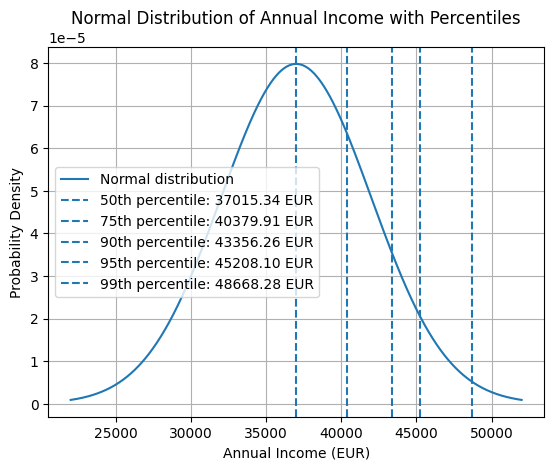

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given data
mean = 37000
std_dev = 5000

# Percentiles
percentiles = [50, 75, 90, 95, 99]
percentile_values = []

for percentile in percentiles:
    value = np.percentile(np.random.normal(mean, std_dev, 10000), percentile)
    percentile_values.append(value)

# Plotting the normal distribution
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

plt.plot(x, y, label='Normal distribution')
for p, v in zip(percentiles, percentile_values):
    plt.axvline(x=v, linestyle='--', label=f'{p}th percentile: {v:.2f} EUR')

plt.xlabel('Annual Income (EUR)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Annual Income with Percentiles')
plt.legend()
plt.grid()
plt.show()